# 1. Importing Necessary libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score,f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools
from sklearn.model_selection import train_test_split
%matplotlib inline

data=pd.read_csv('Creditcard.csv')


C:\Users\Take\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# 2. Visualising output values

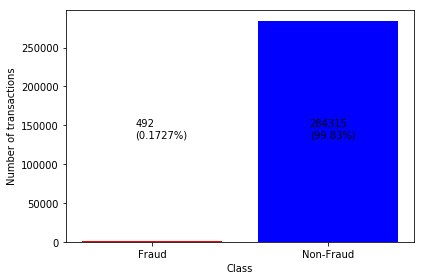

In [8]:
plt.bar(['Non-Fraud','Fraud'], data['Class'].value_counts(), color=['b','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[1], 
                                         data['Class'].value_counts()[1]/data['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[0], 
                                         data['Class'].value_counts()[0]/data['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

# 3. Identifing the fraud ammount of fraud money

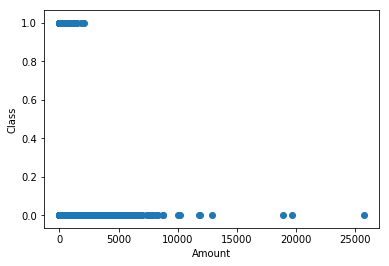

In [9]:
plt.scatter(data['Amount'], data['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

Fraud ammount is less than 2000.

# 4. IDentifing the correlation between features and output

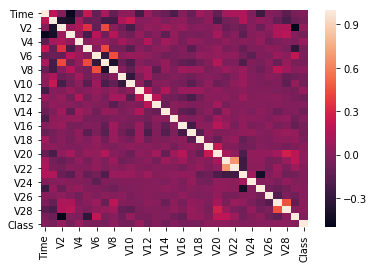

In [10]:
heatmap = sns.heatmap(data.corr(method='spearman'))


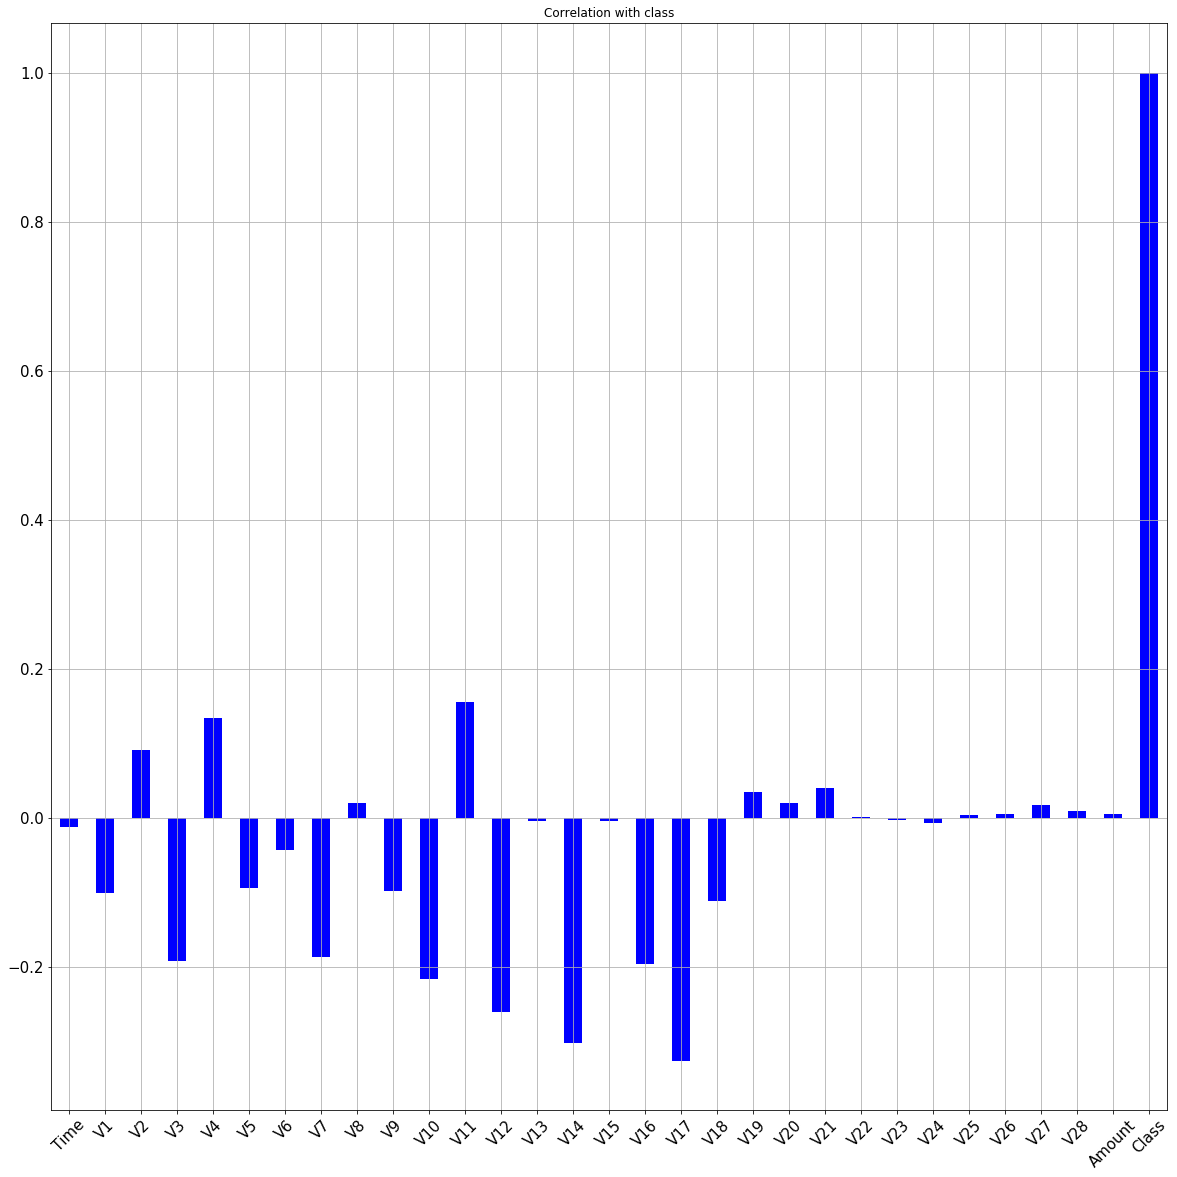

In [11]:
data.corrwith(data.Class,axis=0,drop=False).plot.bar(
        figsize = (20, 20), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True, color=['blue'])
plt.show()

# 5.Dimention reduction


As we see above some features very less correlated with output.Inorder to decrease complexity I am going to extract those valuesfrom the dataset


I will extract features which is less than 0.09 correlation with output.

In [12]:
print(data.corrwith(data.Class,axis=0,drop=False))

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
dtype: float64


As we absorved above we will drop Time,V6,V8,V13,V15,V19-V28 AND Ammount columns.

In [2]:
data=data.drop(['Time','V6','V8','V13','V15','V19','V20','V21','V22','V23','V24'
          ,'V25','V26','V27','V28','Amount'],axis=1)

# 6. Defining the functions for generating the report

In [3]:
def generate_model_report(y_actual,y_predicted):
    print("Accuracy= ",accuracy_score(y_actual,y_predicted))
    print("Precision= ",precision_score(y_actual,y_predicted))
    print("Recall= ",recall_score(y_actual,y_predicted))
    print("F1 Score= ",f1_score(y_actual,y_predicted))
    pass

In [4]:
def generate_auc_roc_curve(clf,X_test):
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(Y_test,y_pred_proba)
    auc=roc_auc_score(Y_test,y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with area under the curve="+str(auc))
    plt.legend(loc=4)
    plt.show()

# 7.Dividing Features and output,also splitting to test and train test

In [5]:
Y = data['Class']
X = data.drop(['Class'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

0    284315
1       492
Name: Class, dtype: int64


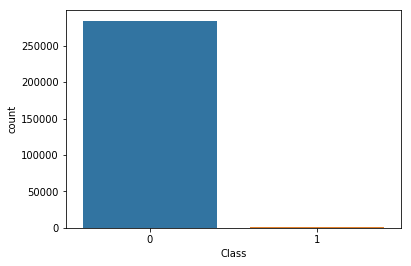

In [6]:
ax=sns.countplot(x=Y,data=data)
print(data['Class'].value_counts())

In [40]:
100*(284315/float(data.shape[0]))

99.82725143693798

In [41]:
Y_test.value_counts()

0    56875
1       87
Name: Class, dtype: int64

# 8.Predicting by Logistic regression

C:\Users\Take\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy=  0.999350444156
Precision=  0.790697674419
Recall=  0.781609195402
F1 Score=  0.78612716763


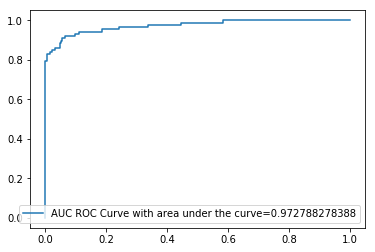

In [7]:
clf=LogisticRegression().fit(X_train,Y_train)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train,Y_train)
Y_test_pred=classifier.predict(X_test)
generate_model_report(Y_test,Y_test_pred)
generate_auc_roc_curve(clf,X_test)

Inspite of high accuracy the precision and recall values are very low precision and recall values.

#    # Undersampling

As we see our output not balanced properly, inorder to solve y=this imbalance we have to use either Undersampling or oversampling technique. 
In this problem we are going to use Undetsampling

In [7]:
minority_class_len=len(data[data['Class']==1])
print(minority_class_len)

492


In [8]:
majority_class_indices=data[data['Class']==0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [9]:
random_majority_indices=np.random.choice(majority_class_indices,minority_class_len,
                                        replace=False)
print(len(random_majority_indices))

492


In [10]:
minority_class_indices=data[data['Class']==1].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [11]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])
under_sample=data.loc[under_sample_indices]

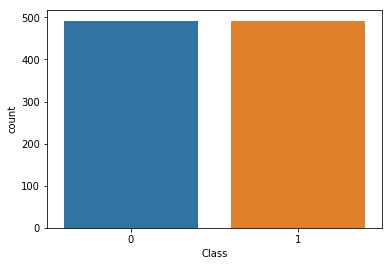

In [12]:
sns.countplot(x='Class',data=under_sample)

# Accuracy with Feature Extraction

C:\Users\Take\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy=  0.92385786802
Precision=  0.934782608696
Recall=  0.905263157895
F1 Score=  0.919786096257


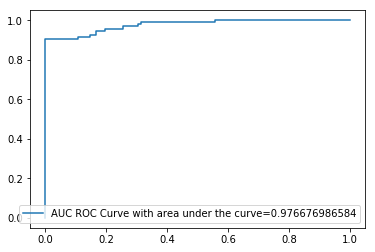

In [15]:
Y = under_sample['Class']
X = under_sample.drop(['Class'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
clf=LogisticRegression().fit(X_train,Y_train)
Y_test_pred=clf.predict(X_test)
generate_model_report(Y_test,Y_test_pred)
generate_auc_roc_curve(clf,X_test)

# Accuracy from Random Forest with Feature Extraction

Accuracy=  0.944162436548
Precision=  0.988372093023
Recall=  0.894736842105
F1 Score=  0.939226519337


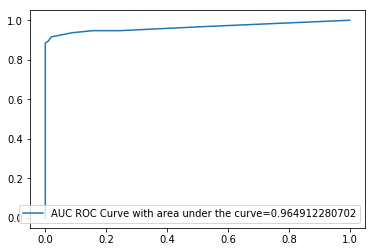

In [13]:
Y = under_sample['Class']
X = under_sample.drop(['Class'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, Y_train)
Y_test_pred = classifierRF.predict(X_test)
generate_model_report(Y_test,Y_test_pred)
generate_auc_roc_curve(classifierRF,X_test)

# Rsult: The best accuracy is from Random forest classification